# Data analysis of the Wisconsin Breast Cancer Original Dataset

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-analysis-of-the-Wisconsin-Breast-Cancer-Original-Dataset" data-toc-modified-id="Data-analysis-of-the-Wisconsin-Breast-Cancer-Original-Dataset-1">Data analysis of the Wisconsin Breast Cancer Original Dataset</a></span><ul class="toc-item"><li><span><a href="#1.-Overview-and-Background" data-toc-modified-id="1.-Overview-and-Background-1.1">1. Overview and Background</a></span></li><li><span><a href="#2.-Classifiers" data-toc-modified-id="2.-Classifiers-1.2">2. Classifiers</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#The-following-diagram-explains-how-Random-Forest-works--" data-toc-modified-id="The-following-diagram-explains-how-Random-Forest-works---1.2.0.1">The following diagram explains how Random Forest works -</a></span></li></ul></li></ul></li></ul></li></ul></div>

## 1. Overview and Background

The following analysis is of the Wisconsin Cancer Original Dataset. In the dataset there is 9 attributes that are used to be classfied in Diagnosis column which are beneign or malignent. In the context of this dataset beniegn is where the tumour will have no harmful effect on patient and the malignant means there is harmful.

According the description of the dataset is from different timings and can be separated into the following groups:
- Group 1: 367 instances (January 1989)
- Group 2:  70 instances (October 1989)
- Group 3:  31 instances (February 1990)
- Group 4:  17 instances (April 1990)
- Group 5:  48 instances (August 1990)
- Group 6:  49 instances (Updated January 1991)
- Group 7:  31 instances (June 1991)
- Group 8:  86 instances (November 1991)
- Total:   699 points (as of the donated datbase on 15 July 1992)


The attributes that contribute to the classifiers mentioning in the opening lines are the following and are scored in the domain of 1-10:

Attribute                     Domain
1. Sample code number            id number
2. Clump Thickness               1 - 10
3. Uniformity of Cell Size       1 - 10
4. Uniformity of Cell Shape      1 - 10
5. Marginal Adhesion             1 - 10
6. Single Epithelial Cell Size   1 - 10
7. Bare Nuclei                   1 - 10
8. Bland Chromatin               1 - 10
9. Normal Nucleoli               1 - 10
10. Mitoses                       1 - 10
11. Class:                        (2 for benign, 4 for malignant)

This is the context of the dataset that will be reviewed and analysed in the project.

In [3]:
# imports to be used

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# load in the dataset
# headers in the excel are as follows 
# id,"clump_thickness","size_uniformity","shape_uniformity","marginal_adhesion","epithelial_size",
#"bare_nucleoli","bland_chromatin","normal_nucleoli","mitoses","class"

# Set the headers in shorter version
# remove the the longer format with header=None
headers = ["ID","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses","Diagnosis"]
data = pd.read_csv('data\Wisconsin_breast_cancer_data.csv',    
         header=None, index_col=['ID'], names = headers)

In [11]:
# View the shape of the dataset
data.shape

(699, 10)

In [5]:
# check if there is any null values in the columns.
data.isnull().sum()

CT           0
UCSize       0
UCShape      0
MA           0
SECSize      0
BN           0
BC           0
NN           0
Mitoses      0
Diagnosis    0
dtype: int64

In [6]:
# check that the data is correct
data.head(10)

,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitoses,Diagnosis
ID,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2
1017122,8,10,10,8,7,10,9,7,1,4
1018099,1,1,1,1,2,10,3,1,1,2
1018561,2,1,2,1,2,1,3,1,1,2
1033078,2,1,1,1,2,1,1,1,5,2


In [9]:
# check the end rows to ensure the dataset matches
data.tail(10)

,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitoses,Diagnosis
ID,,,,,,,,,,
654546,1,1,1,1,2,1,1,1,8,2
654546,1,1,1,3,2,1,1,1,1,2
695091,5,10,10,5,4,5,4,4,1,4
714039,3,1,1,1,2,1,1,1,1,2
763235,3,1,1,1,2,1,2,1,2,2
776715,3,1,1,1,3,2,1,1,1,2
841769,2,1,1,1,2,1,1,1,1,2
888820,5,10,10,3,7,3,8,10,2,4
897471,4,8,6,4,3,4,10,6,1,4


In [7]:
# check the datatypes
data.dtypes

CT            int64
UCSize        int64
UCShape       int64
MA            int64
SECSize       int64
BN           object
BC            int64
NN            int64
Mitoses       int64
Diagnosis     int64
dtype: object

In [17]:
# Bare Nuclei field should be an integer field. According to the dtypes command it is an object so I am going to change
# incase there is any issues later on in the data analysis
data['BN'] = pd.to_numeric(data['BN'], errors='coerce')

In [18]:
# Get the count of each value within each column
for var in data.columns:
    
    print(data[var].value_counts())

1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: CT, dtype: int64
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: UCSize, dtype: int64
1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: UCShape, dtype: int64
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: MA, dtype: int64
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: SECSize, dtype: int64
1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: BN, dtype: int64
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
Name: BC, dtype: int64
1     443
10     61
3      44
2      36
8      24
6      22
5      19
4      18
7      16
9      16
Name:

In [8]:
# Transpose the data
data.describe()

,CT,UCSize,UCShape,MA,SECSize,BC,NN,Mitoses,Diagnosis
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


## 2. Classifiers

For the dataset the Diagnosis column will be the classifier. There will be 2 classes which are Beneign and Malignant. Firstly I will review two classifier methods used in a study conducted in the University of Surrey, Guildford, in the UK. In this study, two ensemble ML classifier: eXtreme Gradient Boosting (XGBoost) and Random Forest (RF) classifiers are used to test the Wisconsin Breast Cancer dataset(An Evaluation of the WBDC).

XG boost is a decision-tee based Machine Learning algorithm which used a gradient boosting framework. So the XGboost is a more powerful version gradient boosting as both use Decision Trees which are made up of binary questions and the final predictions happen at the leaf. (Wikipedia)

Boosting is to attempt to build a strong classifier from a number of weak classifiers. With booosting it begins by building the first made which is from the training data. Then from this first model, the second model is built by correcting the errors . This procedure is continued in the complete training data is predicted correctly.

XG boost uses Cross-Validation as its evaluation process. In this process it estimates the unseen data by generating many non-overlapping train/test splits into training data and reporting the average test set performance across all data splits. (towardsdatascience) 

XG Boost is ususing used on larger datasets that have more than 1000 training samples, that have less than 100 features. So really compared to the Gradient Boosting, its main difference is that it can work quicker through larger datasets.

##### The following diagram is to explain the process of XGboost:

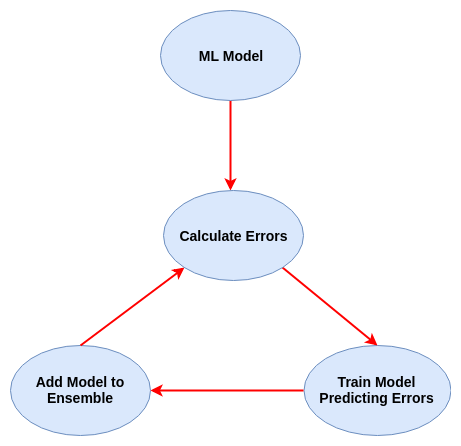

Random forest builds a multitude decision trees from different samples at training times, then takes the majority vote for the classification and in the case of regression it takes the average vote. (analyticsvidhya) A decision tree is really a question posed and then you have a choice of yes or no. Descision trees are sensitive to the training data, one change to the data, can change the leafs in the decision tree completely. Random forests will generally perform better than decision trees but their accuracy can be lower than gradient boosted trees.(Wikipedia)

In the study, Random Forest will take more processing time, as the decision trees will have to be created so the algorithm will have to parse through the data. With Random Forest will reduce the ris of overfitting as there will be a robust number of decision trees, which will get the average, therefore lead to less errors.

Random forest is used in Finance, as it allows businesses to spend less time on data management and pre-preprocessing tasks. Customers who have a high credit risks can be evaluated. (ibm)

#### The following diagram explains how Random Forest works -

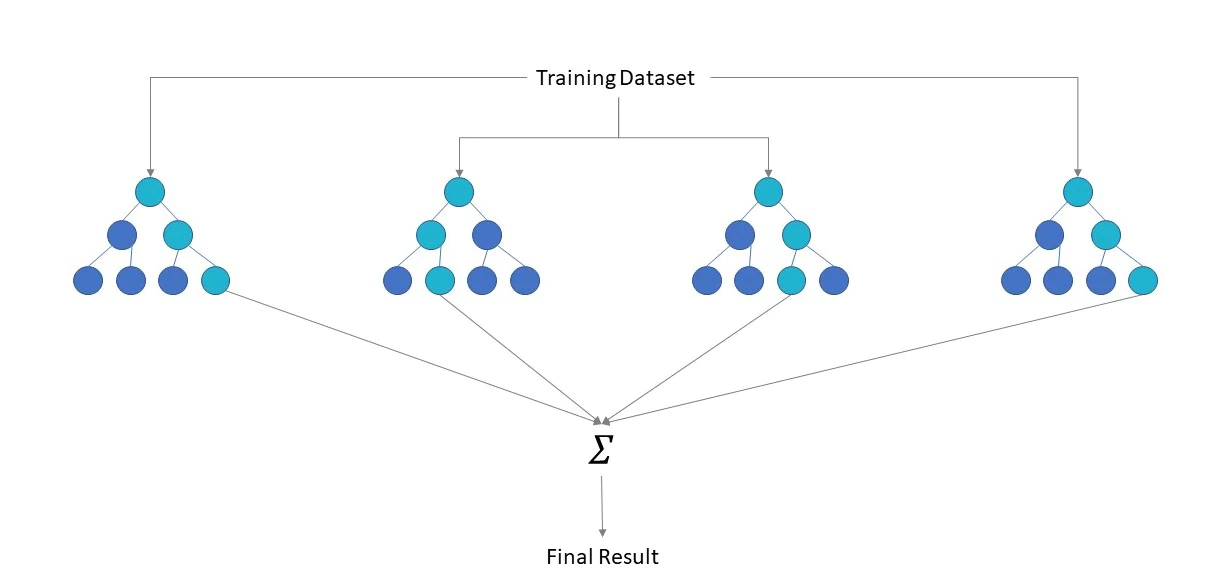